In [72]:
import pandas as pd  
import matplotlib.pyplot as plt

In [73]:
# load the dataset
df=pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
# to count rows and columns 
df.shape

(7043, 21)

In [75]:
# column name and data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [76]:
# any missing value 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn'>

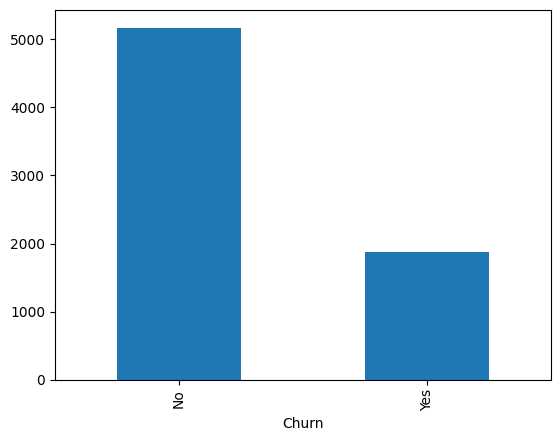

In [77]:
# distribution of churn column
df['Churn'].value_counts().plot(kind='bar')

In [23]:
# unique value 
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [47]:
# average monthly charges of customer 
df['MonthlyCharges'].mean()

np.float64(64.76169246059918)

In [50]:
# top 5 most common internet services types
df['InternetService'].value_counts().head()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

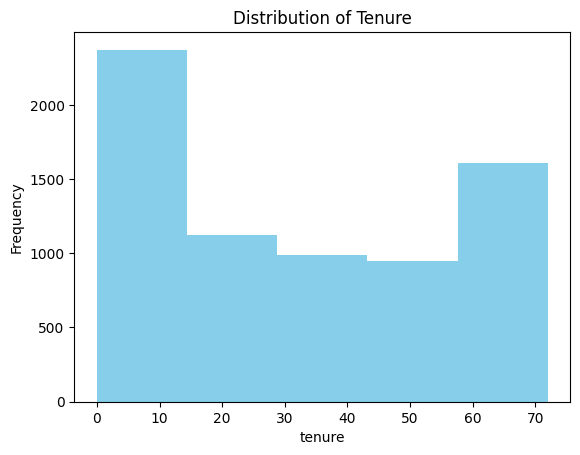

In [53]:
# distribution of tenure using histogram 
df['tenure'].plot(kind='hist',bins=5,title='Distribution of Tenure',color='skyblue')
plt.xlabel('tenure')
plt.show()

<Axes: xlabel='Contract'>

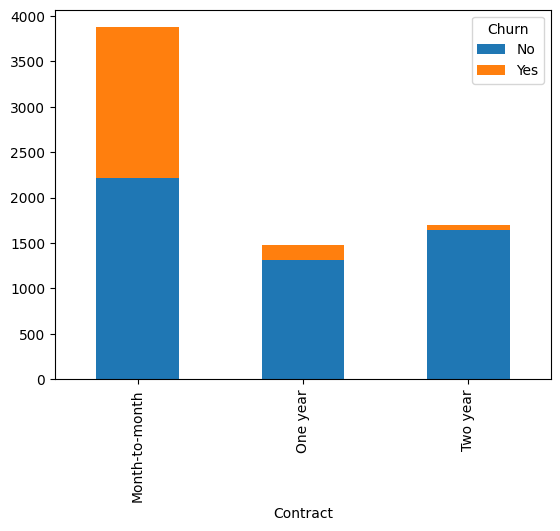

In [26]:
# how contract type affected churn
pd.crosstab(df['Contract'],df['Churn']).plot(kind='bar',stacked=True)

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
# how many customers have Phone Services 
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [35]:
# Compare MonthlyCharges for customers with and without StreamingTV.
df.groupby('StreamingTV')['MonthlyCharges'].mean()

StreamingTV
No                     65.387687
No internet service    21.079194
Yes                    88.736738
Name: MonthlyCharges, dtype: float64

In [37]:
# gender highest churn rate
df.groupby('gender')['Churn'].idxmax()

gender
Female    4
Male      2
Name: Churn, dtype: int64

In [39]:
# Find the average TotalCharges grouped by SeniorCitizen
df.groupby('SeniorCitizen')['MonthlyCharges'].mean()

SeniorCitizen
0    61.847441
1    79.820359
Name: MonthlyCharges, dtype: float64

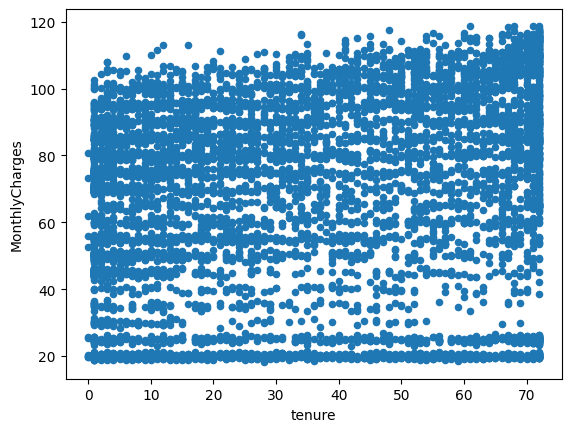

In [69]:
# Tenure vs Total Charges scatter plot
df.plot.scatter(x='tenure',y='MonthlyCharges')
plt.show()

In [68]:
# descriptive stats for numerical columns 
df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [46]:
# churn rate by contract type 
df.groupby('Contract')['Churn'].value_counts(normalize=True)*100

Contract        Churn
Month-to-month  No       57.290323
                Yes      42.709677
One year        No       88.730482
                Yes      11.269518
Two year        No       97.168142
                Yes       2.831858
Name: proportion, dtype: float64

In [50]:
# payment method with highest churn
df[df['Churn']=='Yes']['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: count, dtype: int64

In [51]:
# top 10 by monthly charges 
df.sort_values(by='MonthlyCharges',ascending=False).head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
2115,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.6,No
4804,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.7,No
3894,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
5127,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes
6118,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.8,Yes
3205,3810-DVDQQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),117.60,8308.9,No
6768,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.1,No
4875,2302-ANTDP,Female,1,Yes,No,48,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,117.45,5438.9,Yes


In [53]:
# Customers with 0 tenure and churned
df[(['tenure']==0) & (df['Churn']=='Yes')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [57]:
# No InternetService but MonthlyCharges > 80
df[(['InternetService']=='No') & (df['MonthlyCharges']>80)]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [58]:
# Sort by TotalCharges descending
df.sort_values(by='TotalCharges',ascending=False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2845,9093-FPDLG,Female,0,No,No,11,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.20,999.9,No
3353,4536-PLEQY,Male,0,Yes,No,12,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.05,999.8,No
3686,5899-MQZZL,Female,0,No,No,13,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.00,999.45,Yes
5598,6051-PTVNS,Female,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.15,998.1,No
6646,8249-THVEC,Male,0,Yes,Yes,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No


In [60]:
# Crosstab of gender vs. churn
pd.crosstab(df['gender'],df['Churn'])

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [61]:
# TechSupport usage by gender
pd.crosstab(df['gender'],df['TechSupport'])

TechSupport,No,No internet service,Yes
gender,,,
Female,1714,747,1027
Male,1759,779,1017


In [63]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [64]:
df['TotalCharges'].mean()

np.float64(2283.3004408418656)

In [79]:
# final 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
